<a href="https://colab.research.google.com/github/Praneeth-18/Deep-Learning-5/blob/main/Basic_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a) Write  a colab  numpy only from scratch 3 layer deep neural network for non linear regression . Use proper non linear activation functions and proper number of hidden layer neurons - show the results / loss and epochs training and final output . You will be doing manual backprop and chain rule based gradient propagation


In [1]:
import numpy as np

# 1. Initialization
class LinearLayer:
    def __init__(self, input_dim, output_dim):
        self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2. / input_dim)
        self.bias = np.zeros(output_dim)

    def forward(self, x):
        self.x = x
        return x @ self.weights + self.bias

    def backward(self, output_gradient, lr):
        weights_gradient = self.x.T @ output_gradient
        bias_gradient = np.sum(output_gradient, axis=0)

        self.weights -= lr * weights_gradient
        self.bias -= lr * bias_gradient
        return output_gradient @ self.weights.T

In [2]:
# 2. Activation Function
class ReLU:
    def forward(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, output_gradient, lr):
        return np.where(self.x > 0, output_gradient, 0)

In [3]:
# 3. Loss Function
class MSE:
    def forward(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return np.mean((y_pred - y_true) ** 2)

    def backward(self):
        return 2 * (self.y_pred - self.y_true) / self.y_true.size

In [4]:
# Combining the network
class ThreeLayerNN:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.linear1 = LinearLayer(input_dim, hidden_dim)
        self.relu1 = ReLU()
        self.linear2 = LinearLayer(hidden_dim, hidden_dim)
        self.relu2 = ReLU()
        self.linear3 = LinearLayer(hidden_dim, output_dim)

    def forward(self, x):
        x = self.linear1.forward(x)
        x = self.relu1.forward(x)
        x = self.linear2.forward(x)
        x = self.relu2.forward(x)
        x = self.linear3.forward(x)
        return x

    def backward(self, output_gradient, lr):
        output_gradient = self.linear3.backward(output_gradient, lr)
        output_gradient = self.relu2.backward(output_gradient, lr)
        output_gradient = self.linear2.backward(output_gradient, lr)
        output_gradient = self.relu1.backward(output_gradient, lr)
        output_gradient = self.linear1.backward(output_gradient, lr)
        return output_gradient

In [5]:
# Data
n = 200  # number of samples
d = 2  # dimensions
x = np.random.uniform(-1, 1, (n, d))

# Non-linear function
y_true = (x ** 2) @ np.array([[2], [-3]]) + x @ np.array([[2], [-3]]) + np.array([[5]])

In [6]:
# Training
model = ThreeLayerNN(d, 64, 1)
loss_fn = MSE()
lr = 0.01
epochs = 1000
losses = []

for epoch in range(epochs):
    y_pred = model.forward(x)
    loss = loss_fn.forward(y_pred, y_true)
    losses.append(loss)

    output_gradient = loss_fn.backward()
    model.backward(output_gradient, lr)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

Epoch 0, Loss: 26.5381536194864
Epoch 100, Loss: 0.3011125193695865
Epoch 200, Loss: 0.06803885131759613
Epoch 300, Loss: 0.049598721047325114
Epoch 400, Loss: 0.039955243337608276
Epoch 500, Loss: 0.034288129266005864
Epoch 600, Loss: 0.02913120809911894
Epoch 700, Loss: 0.024492007807672155
Epoch 800, Loss: 0.02103844853028539
Epoch 900, Loss: 0.01815000429091176


In [7]:
# Final loss
print(f'Final Loss: {losses[-1]}')

Final Loss: 0.015869892253028175


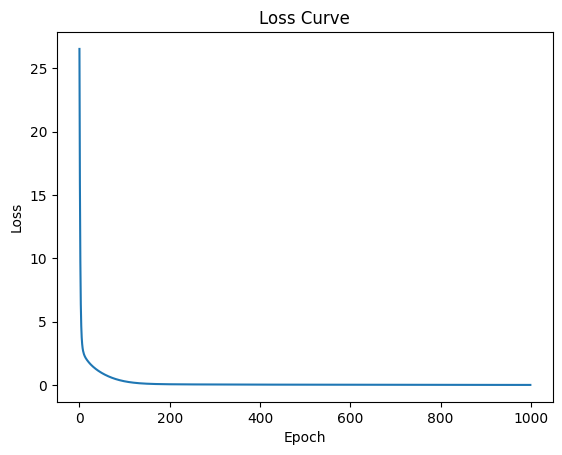

In [8]:
# Plotting the loss curve
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

---

b) Write a colab pytorch from scratch - 3 layer deep neural network for non linear regression without using pytorch builtin layer functionality

In [9]:
import torch

# 1. Define the model
class ThreeLayerNNManual(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ThreeLayerNNManual, self).__init__()
        self.weights1 = torch.nn.Parameter(torch.randn(input_dim, hidden_dim) * torch.sqrt(torch.tensor(2. / input_dim)))
        self.bias1 = torch.nn.Parameter(torch.zeros(hidden_dim))
        self.weights2 = torch.nn.Parameter(torch.randn(hidden_dim, hidden_dim) * torch.sqrt(torch.tensor(2. / hidden_dim)))
        self.bias2 = torch.nn.Parameter(torch.zeros(hidden_dim))
        self.weights3 = torch.nn.Parameter(torch.randn(hidden_dim, output_dim) * torch.sqrt(torch.tensor(2. / hidden_dim)))
        self.bias3 = torch.nn.Parameter(torch.zeros(output_dim))

    def forward(self, x):
        x = torch.mm(x, self.weights1) + self.bias1
        x = torch.relu(x)
        x = torch.mm(x, self.weights2) + self.bias2
        x = torch.relu(x)
        x = torch.mm(x, self.weights3) + self.bias3
        return x

In [10]:
# Data
x_tensor = torch.tensor(x, dtype=torch.float32)
y_true_tensor = torch.tensor(y_true, dtype=torch.float32)

In [11]:
# Model, Loss, and Optimizer
model = ThreeLayerNNManual(d, 64, 1)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
# Training Loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_tensor)
    loss = loss_fn(y_pred, y_true_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 29.697378158569336
Epoch 100, Loss: 0.3127163052558899
Epoch 200, Loss: 0.06158306077122688
Epoch 300, Loss: 0.03951691463589668
Epoch 400, Loss: 0.028089327737689018
Epoch 500, Loss: 0.02141466923058033
Epoch 600, Loss: 0.01750052534043789
Epoch 700, Loss: 0.014646241441369057
Epoch 800, Loss: 0.0125427870079875
Epoch 900, Loss: 0.010781003162264824


In [13]:
# Final evaluation
model.eval()
with torch.no_grad():
    y_pred = model(x_tensor)
    final_loss = loss_fn(y_pred, y_true_tensor)
print(f'Final Loss: {final_loss.item()}')

Final Loss: 0.009286013431847095


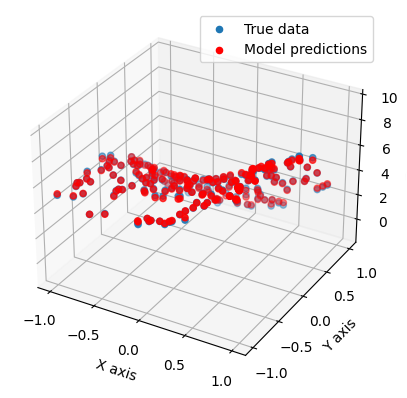

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot 3D data and predictions
def plot_3d(x, y, y_pred=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], y, label='True data')

    if y_pred is not None:
        ax.scatter(x[:, 0], x[:, 1], y_pred, label='Model predictions', color='r')

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.legend()
    plt.show()

# Generating predictions from the model for plotting
model.eval()
with torch.no_grad():
    y_pred = model(x_tensor).numpy()

plot_3d(x, y_true.squeeze(), y_pred.squeeze())

---

c) Write  a colab pytorch classes based - 3 layer deep neural network for non linear regression using pytorch builtin functionality of modules etc.,. backprop etc.,.

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. Define the Neural Network
class ThreeLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ThreeLayerNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.layer1(x))
        out = self.relu(self.layer2(out))
        return self.layer3(out)

In [16]:
# Example parameters
input_size = 2 # Assuming input features are 2-dimensional
hidden_size = 64 # Size of the hidden layers
output_size = 1 # Output feature size

In [17]:
# Initialize the model, loss, and optimizer
model = ThreeLayerNet(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [18]:
# Example data (x and y_true need to be PyTorch tensors)
x = torch.randn(100, input_size) # 100 samples, 2 features
y_true = torch.randn(100, output_size) # 100 target values

In [19]:
# Training Loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y_true)
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch [1/1000], Loss: 1.190782904624939
Epoch [101/1000], Loss: 1.1264322996139526
Epoch [201/1000], Loss: 1.1087980270385742
Epoch [301/1000], Loss: 1.0961493253707886
Epoch [401/1000], Loss: 1.0857051610946655
Epoch [501/1000], Loss: 1.0756957530975342
Epoch [601/1000], Loss: 1.0664502382278442
Epoch [701/1000], Loss: 1.0574527978897095
Epoch [801/1000], Loss: 1.0483897924423218
Epoch [901/1000], Loss: 1.039129376411438


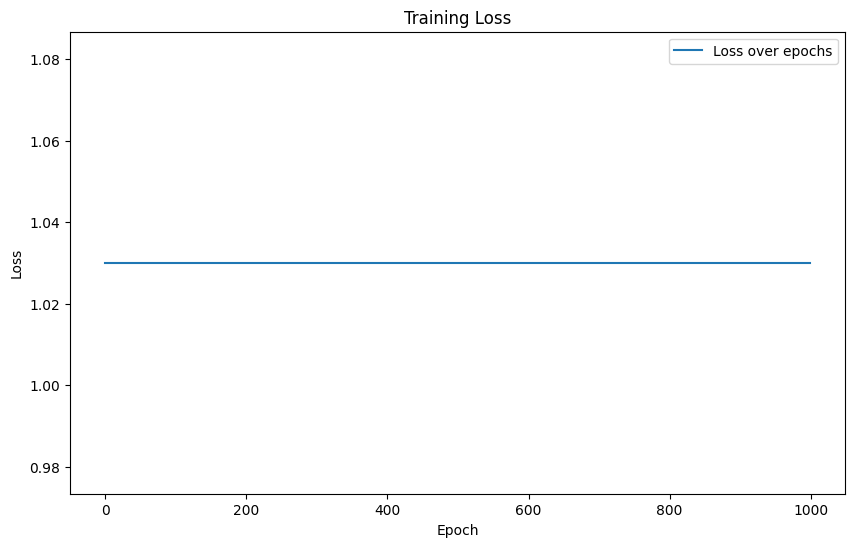

In [21]:
losses = [loss.item() for epoch in range(epochs)]

# Plotting the loss
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

---

d) Write a colab pytorch lightning version of the same

In [22]:
pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 12.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-many

In [23]:
import pytorch_lightning as pl
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

class LitThreeLayerNet(pl.LightningModule):
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        super(LitThreeLayerNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.learning_rate = learning_rate

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = nn.MSELoss()(y_pred, y)
        self.log('train_loss', loss)
        return loss

In [24]:
# Data Preparation
x_tensor = torch.randn(100, 2)  # Example input
y_true_tensor = torch.randn(100, 1)  # Example output
dataset = TensorDataset(x_tensor, y_true_tensor)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [27]:
# Model Training
model = LitThreeLayerNet(input_size=2, hidden_size=64, output_size=1)
trainer = pl.Trainer(max_epochs=1000)
trainer.fit(model, train_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type   | Params
----------------------------------
0 | layer1 | Linear | 192   
1 | layer2 | Linear | 4.2 K 
2 | layer3 | Linear | 65    
3 | relu   | ReLU   | 0     
----------------------------------
4.4 K     Trainable params
0         Non-trainable params
4.4 K     Total params
0.018     Total estimated model params size (MB)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (4) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1000` reached.


---

e) Build the same using Tensorflow various variants low level, api, functional, model, builtin

Write  a colab  tensorflow only from scratch not using high level api  of the same

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

# Hyperparameters
input_dim = 2
hidden_dim = 64  # Size for hidden layers
output_dim = 1
learning_rate = 0.01
num_samples = 10000

In [24]:
# Generate synthetic data
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

In [25]:
# Shuffle and batch the dataset
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

In [26]:
# Initialize weights and biases
w1 = tf.Variable(tf.random.uniform(shape=(input_dim, hidden_dim)))
b1 = tf.Variable(tf.zeros(shape=(hidden_dim,)))
w2 = tf.Variable(tf.random.uniform(shape=(hidden_dim, hidden_dim)))
b2 = tf.Variable(tf.zeros(shape=(hidden_dim,)))
w3 = tf.Variable(tf.random.uniform(shape=(hidden_dim, output_dim)))
b3 = tf.Variable(tf.zeros(shape=(output_dim,)))

In [27]:
# Model forward function
def compute_predictions(features):
    layer1 = tf.matmul(features, w1) + b1
    layer1_activation = tf.nn.relu(layer1)
    layer2 = tf.matmul(layer1_activation, w2) + b2
    layer2_activation = tf.nn.relu(layer2)
    predictions = tf.matmul(layer2_activation, w3) + b3
    return predictions

In [28]:
# Loss function
def compute_loss(labels, predictions):
    return tf.reduce_mean(tf.square(labels - predictions))

In [29]:
# Training function
@tf.function  # Decorator to compile the training step to a static graph
def train_on_batch(x, y):
    with tf.GradientTape() as tape:
        predictions = compute_predictions(x)
        loss = compute_loss(y, predictions)
        dloss_dw1, dloss_db1, dloss_dw2, dloss_db2, dloss_dw3, dloss_db3 = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])

    w1.assign_sub(learning_rate * dloss_dw1)
    b1.assign_sub(learning_rate * dloss_db1)
    w2.assign_sub(learning_rate * dloss_dw2)
    b2.assign_sub(learning_rate * dloss_db2)
    w3.assign_sub(learning_rate * dloss_dw3)
    b3.assign_sub(learning_rate * dloss_db3)
    return loss

In [30]:
# Training loop
for epoch in range(10):
    for step, (x, y) in enumerate(dataset):
        loss = train_on_batch(x, y)
    print(f'Epoch {epoch}: last batch loss = {float(loss):.4f}')

Epoch 0: last batch loss = 683919.0625
Epoch 1: last batch loss = 28073.9668
Epoch 2: last batch loss = 1158.9111
Epoch 3: last batch loss = 49.4051
Epoch 4: last batch loss = 2.0236
Epoch 5: last batch loss = 0.3480
Epoch 6: last batch loss = 0.2425
Epoch 7: last batch loss = 0.2486
Epoch 8: last batch loss = 0.2495
Epoch 9: last batch loss = 0.2498


Time per epoch: 0.226 s


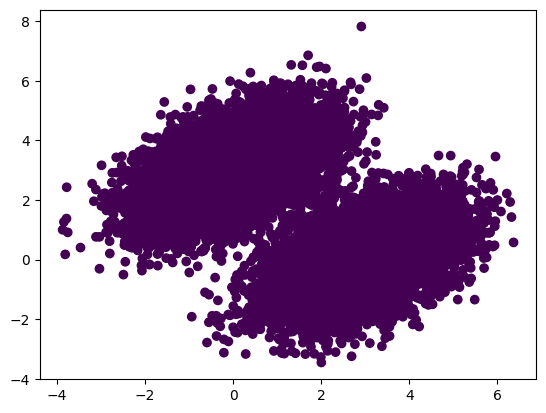

In [32]:
# Timing the training loop with tf.function
t0 = time.time()
for epoch in range(20):
    for step, (x, y) in enumerate(dataset):
        loss = train_on_batch(x, y)
t_end = time.time() - t0
print(f'Time per epoch: {t_end / 20:.3f} s')

# Plotting the predictions
predictions = compute_predictions(features)

# Plotting
plt.scatter(features[:, 0], features[:, 1], c=predictions.numpy()[:, 0] > 0.5)
plt.show()

Write a colab tensorflow only with builtin layers of the same


In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
input_dim = 2
hidden_dim = 64
output_dim = 1
learning_rate = 0.01
num_samples = 10000

In [34]:
# Generate synthetic data
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

In [35]:
# Shuffle and batch the dataset
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)


In [36]:
# Define the model using the Functional API
inputs = tf.keras.Input(shape=(input_dim,))
hidden = tf.keras.layers.Dense(hidden_dim, activation='relu')(inputs)
hidden = tf.keras.layers.Dense(hidden_dim, activation='relu')(hidden)
outputs = tf.keras.layers.Dense(output_dim)(hidden)
model = tf.keras.Model(inputs, outputs)

In [37]:
# Define the optimizer and loss function
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
loss_fn = tf.keras.losses.MeanSquaredError()

In [38]:
# Training loop
for epoch in range(10):
    for step, (x, y) in enumerate(dataset):
        with tf.GradientTape() as tape:
            predictions = model(x, training=True)
            loss = loss_fn(y, predictions)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        if step % 100 == 0:
            print(f'Epoch {epoch}, Step {step}, Loss: {float(loss):.4f}')

Epoch 0, Step 0, Loss: 0.2524
Epoch 1, Step 0, Loss: 0.0338
Epoch 2, Step 0, Loss: 0.0286
Epoch 3, Step 0, Loss: 0.0212
Epoch 4, Step 0, Loss: 0.0168
Epoch 5, Step 0, Loss: 0.0160
Epoch 6, Step 0, Loss: 0.0147
Epoch 7, Step 0, Loss: 0.0112
Epoch 8, Step 0, Loss: 0.0095
Epoch 9, Step 0, Loss: 0.0107


625/625 [==============================] - 1s 2ms/step


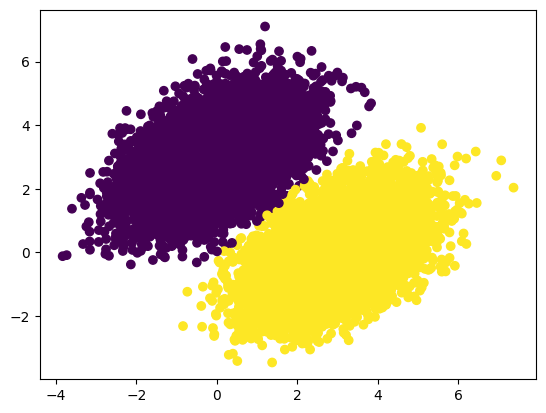

In [39]:
# Evaluate the model
predictions = model.predict(features)
plt.scatter(features[:, 0], features[:, 1], c=np.squeeze(predictions) > 0.5)
plt.show()

 Write a colab with Use functional api high level api  of tensorflow for the same



Epoch 1/10
79/79 [==============================] - 2s 5ms/step - loss: 0.0622
Epoch 2/10
79/79 [==============================] - 1s 8ms/step - loss: 0.0016
Epoch 3/10
79/79 [==============================] - 0s 5ms/step - loss: 8.4697e-04
Epoch 4/10
79/79 [==============================] - 0s 5ms/step - loss: 7.5898e-04
Epoch 5/10
79/79 [==============================] - 0s 2ms/step - loss: 7.3558e-04
Epoch 6/10
79/79 [==============================] - 0s 2ms/step - loss: 7.9816e-04
Epoch 7/10
79/79 [==============================] - 0s 3ms/step - loss: 7.5022e-04
Epoch 8/10
79/79 [==============================] - 0s 2ms/step - loss: 8.2192e-04
Epoch 9/10
79/79 [==============================] - 0s 2ms/step - loss: 7.3439e-04
Epoch 10/10
625/625 [==============================] - 1s 1ms/step


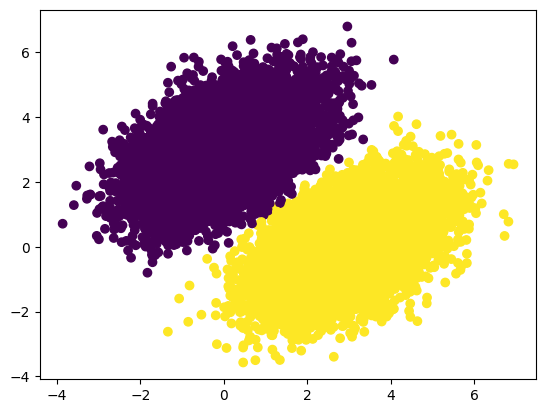

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
input_dim = 2
hidden_dim = 64
output_dim = 1
learning_rate = 0.01
num_samples = 10000

# Generate synthetic data
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

# Shuffle and batch the dataset
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

# Model definition using the Functional API
inputs = tf.keras.Input(shape=(input_dim,))
hidden = tf.keras.layers.Dense(hidden_dim, activation='relu')(inputs)
hidden = tf.keras.layers.Dense(hidden_dim, activation='relu')(hidden)
outputs = tf.keras.layers.Dense(output_dim)(hidden)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.MeanSquaredError())

# Train the model
model.fit(dataset, epochs=10)

# Make predictions
predictions = model.predict(features)

# Plotting the predictions
plt.scatter(features[:, 0], features[:, 1], c=np.squeeze(predictions) > 0.5)
plt.show()

In [41]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create synthetic data
num_samples = 1000
np.random.seed(0)
X = np.random.normal(0, 1, (num_samples, 3))  # Features are 3D points
y = np.random.normal(0, 1, (num_samples, 1))  # Labels for regression

In [42]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=3, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [43]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
32/32 [==============================] - 1s 4ms/step - loss: 1.0458
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0377
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0309
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0256
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 1.0285
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0222
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0234
Epoch 8/10
32/32 [==============================] - 0s 5ms/step - loss: 1.0225
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 1.0213
Epoch 10/10
32/32 [==============================] - 0s 7ms/step - loss: 1.0183


32/32 [==============================] - 0s 3ms/step


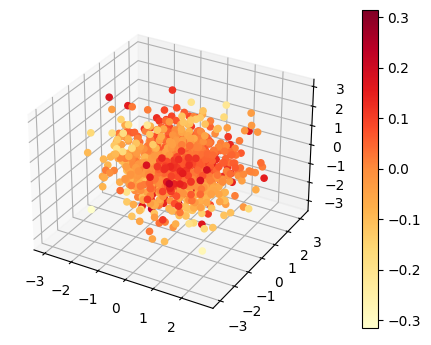

In [44]:
# Make predictions to use as the color dimension 'c'
predictions = model.predict(X).flatten()

# Plotting the "4D" scatter plot
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# The color dimension 'c' could be based on predictions or any other scalar
img = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=predictions, cmap='YlOrRd', alpha=1)
plt.colorbar(img)
plt.show()

Write a colab with tensorflow only but using high level api

In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [46]:
# Build the model using the Sequential API
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [47]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2917 - accuracy: 0.9154 - val_loss: 0.1368 - val_accuracy: 0.9577
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1428 - accuracy: 0.9580 - val_loss: 0.1019 - val_accuracy: 0.9691
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1066 - accuracy: 0.9682 - val_loss: 0.0854 - val_accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0878 - accuracy: 0.9729 - val_loss: 0.0748 - val_accuracy: 0.9777
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0755 - accuracy: 0.9766 - val_loss: 0.0712 - val_accuracy: 0.9791


In [48]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 - 1s - loss: 0.0712 - accuracy: 0.9791 - 659ms/epoch - 2ms/step

Test accuracy: 0.9790999889373779
313/313 [==============================] - 1s 3ms/step


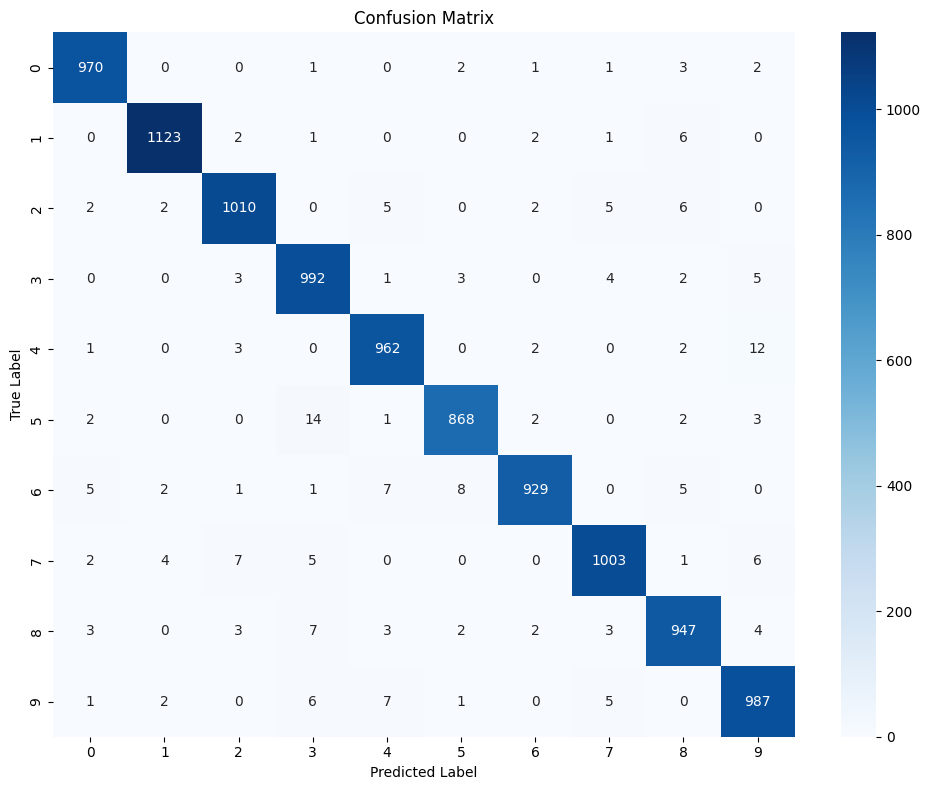

In [49]:
# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

---

h) repeat the above using JAX.



In [50]:
!pip install jax jaxlib flax

In [64]:
import jax
import jax.numpy as jnp
from flax import linen as nn
from flax.training import train_state
import optax
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load and prepare the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

# Convert numpy arrays to JAX arrays
x_train = jnp.array(x_train)
y_train = jnp.array(y_train)
x_test = jnp.array(x_test)
y_test = jnp.array(y_test)

In [65]:
# Define the model
class SimpleNN(nn.Module):
    @nn.compact
    def __call__(self, x):
        x = nn.Dense(features=128)(x)
        x = nn.relu(x)
        x = nn.Dense(features=10)(x)
        return x

In [66]:
# Initialize the model parameters
rng = jax.random.PRNGKey(0)
init_rng = rng
model = SimpleNN()
params = model.init(init_rng, jnp.ones([1, 28*28]))['params']

# Define the optimizer
optimizer = optax.adam(1e-3)
state = train_state.TrainState.create(apply_fn=model.apply, params=params, tx=optimizer)

In [67]:
# Loss function
def loss_fn(params, x, y):
    logits = model.apply({'params': params}, x)
    one_hot_y = jax.nn.one_hot(y, num_classes=10)
    loss = optax.softmax_cross_entropy(logits=logits, labels=one_hot_y).mean()
    return loss

# Training step
@jax.jit
def train_step(state, x, y):
    grads = jax.grad(loss_fn)(state.params, x, y)
    return state.apply_gradients(grads=grads)

In [68]:
# Train the model
for epoch in range(5):
    for i in range(0, len(x_train), 64):
        batch_x = jnp.array(x_train[i:i+64])
        batch_y = jnp.array(y_train[i:i+64])
        state = train_step(state, batch_x, batch_y)

In [69]:
# Evaluate and plot confusion matrix
pred_logits = model.apply({'params': state.params}, x_test)
pred_labels = jnp.argmax(pred_logits, axis=1)
confusion_mtx = confusion_matrix(y_test, pred_labels)

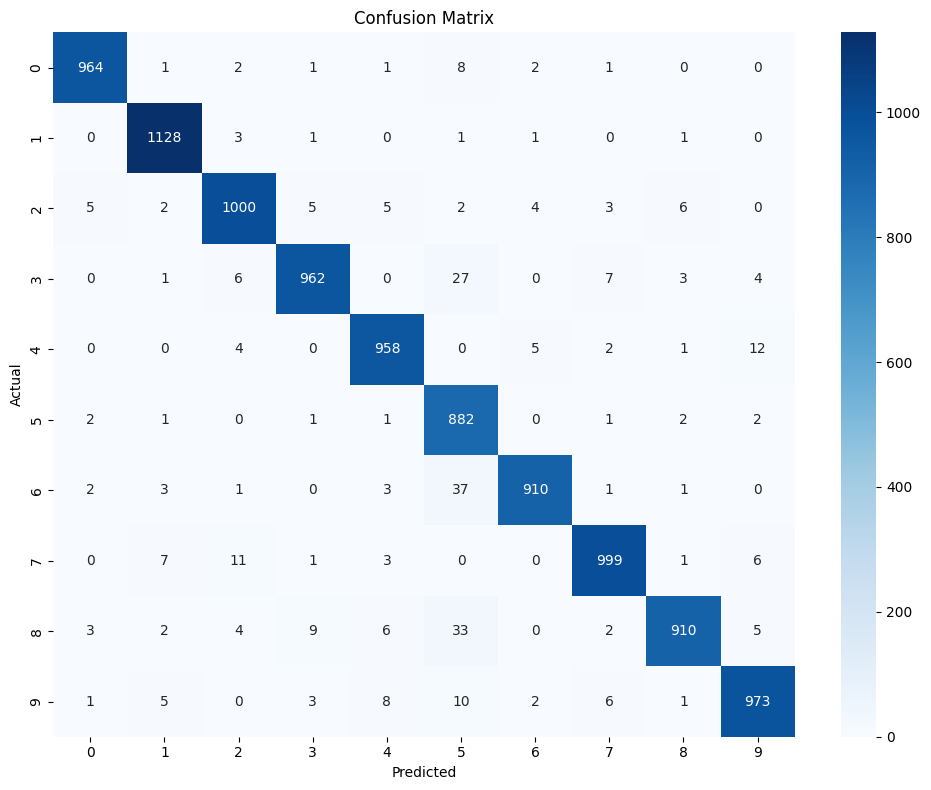

In [70]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()